In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from PIL import Image

In [14]:
image_names = list(os.walk('./classify docs.v1i.multiclass/train/'))[0][2]

In [15]:
len(image_names)

3806

In [16]:
df = pd.read_csv('./classify docs.v1i.multiclass/train_classes.csv')

In [17]:
df.head()

,filename,Aadhar,Pan,Unlabeled
0,122_png_jpg.rf.848c59396884a873e17424e08be7245...,1,0,0
1,IPPBAND00577_aadharBack_png_jpg.rf.83fa99065bc...,0,0,1
2,6206879841_jpg.rf.8389cf5f7c937907fb0137d8fb72...,0,0,1
3,8252228087_jpg.rf.8495f734df5bf593e190a9cf1970...,0,0,1
4,41e82df9-58c10f76367dd5b167225fbe_pan_jpg.rf.8...,0,1,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3806 entries, 0 to 3805
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   filename    3806 non-null   object
 1    Aadhar     3806 non-null   int64 
 2    Pan        3806 non-null   int64 
 3    Unlabeled  3806 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 119.1+ KB


In [19]:
aadhar_index = np.where(df[' Aadhar'] == 1)[0].tolist()
pan_index = np.where(df[' Pan'] == 1)[0].tolist()
df = df.iloc[aadhar_index+pan_index]
df = df.reset_index(drop=True)

In [20]:
X_train = []
y_train = []

for i in range(len(df)):
    
    img = np.array(Image.open(f"./classify docs.v1i.multiclass/train/{df.iloc[i]['filename']}"))
    if img is not None:
        img = cv2.resize(img,(128,128))
        if(img.shape == (128,128,3)):
            X_train.append(img)
            if(df.iloc[i][' Aadhar'] == 1):
                y_train.append(0)
            elif(df.iloc[i][' Pan'] == 1):
                y_train.append(1)

In [21]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [22]:
X_train.shape, y_train.shape

((2231, 128, 128, 3), (2231,))

1


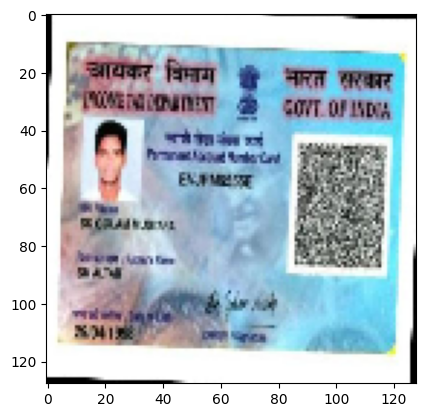

In [29]:
print(y_train[1500])
plt.imshow(X_train[1500])

In [24]:
np.save('./x_train.npy',X_train)
np.save("./y_train.npy",y_train)